In [1]:
using Pkg, KomaMRI

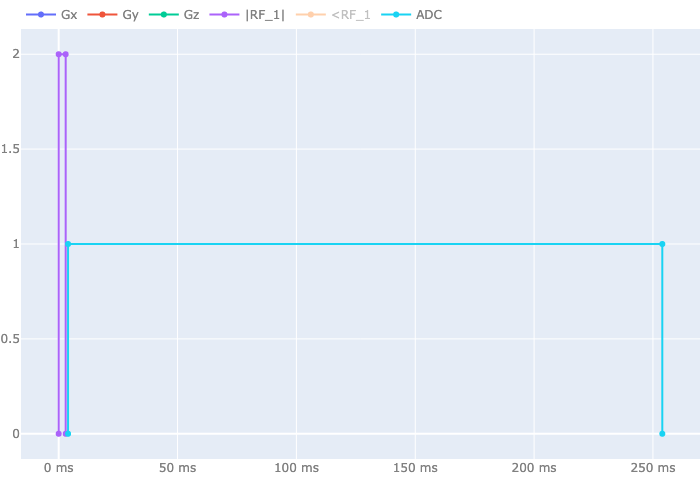

In [2]:
# SCANNER #
sys = Scanner()

# RF PULSE #
# 1st block -> RF block
ampRF = 2e-6; # 2μT RF amplitude
durRF = π / 2 / (2π * γ * ampRF); # This is the required duration for a 90deg pulse with ampRF 
                                 # (π / 2) / (2π * γ * ampRF)
exc = RF(ampRF, durRF)

# 2nd block -> ADC block
nADC = 8192 ;
durADC = 250e-3 ;
delay = 1e-3 ;
aqc = ADC(nADC, durADC, delay)

# concatenating the two blocks
seq  = Sequence()
seq += exc
seq += aqc
p1 = plot_seq(seq; slider = false, height = 300)

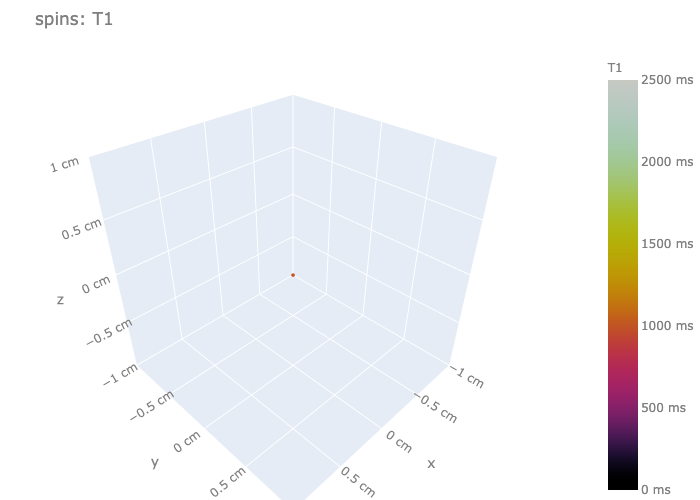

In [3]:
# PHANTOM #
obj = Phantom{Float64}(x = [0.], T1 = [1000e-3], T2 = [100e-3],Δw=[-2π*100])
p3 = plot_phantom_map(obj, :T1;  darkmode=false)



┌ Info: The GPU function is being called but the GPU is not accessible. 
│ Defaulting back to the CPU. (No action is required if you want to run on the CPU).
└ @ KomaMRI /Users/amandanicotina/.julia/packages/KomaMRI/qZTLv/src/simulation/GPUFunctions.jl:29
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.7.3
│   sim_method = KomaMRI.Bloch()
│   spins = 1
│   time_points = 9338
│   adc_points = 8192
└ @ KomaMRI /Users/amandanicotina/.julia/packages/KomaMRI/qZTLv/src/simulation/SimulatorCore.jl:219


Progress:  10%|███▉                                     |  ETA: 0:00:35
  simulated_blocks:  2
  rf_blocks:         1





Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
  simulated_blocks:  21
  rf_blocks:         1
  acq_samples:       8192


  4.094869 seconds (26.13 M allocations: 1.252 GiB, 4.63% gc time, 99.25% compilation time: 1% of which was recompilation)


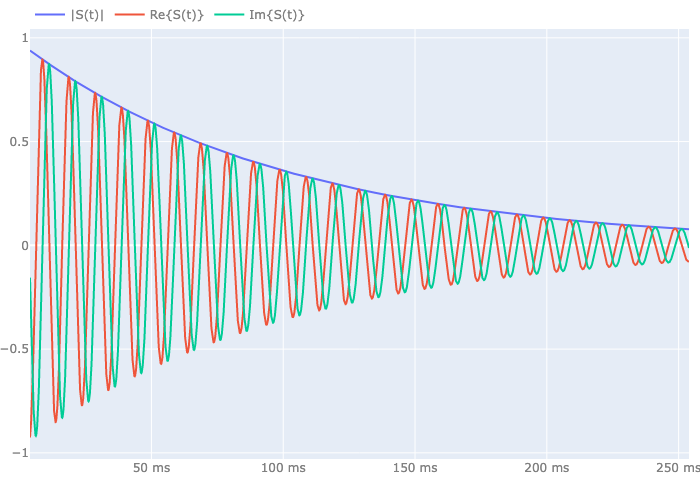

In [4]:
# SIMULATE #
raw = simulate(obj, seq, sys)
p2 = plot_signal(raw; slider = false, height = 300)